In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
df = pd.read_csv('temperatures_nov2019_modified.csv',index_col = 'id')

In [3]:
df.head()

,date_time,device_id,latlng,temperature
id,,,,
0,2019-04-01 07:00:00+00:00,840,37.1840165#-119.3815455,12.1422
1,2019-04-01 07:10:00+00:00,840,37.1840165#-119.3815455,11.9269
2,2019-04-01 07:20:00+00:00,840,37.1840165#-119.3815455,11.4825
3,2019-04-01 07:30:00+00:00,840,37.1840165#-119.3815455,11.6977
4,2019-04-01 07:40:00+00:00,840,37.1840165#-119.3815455,11.9755


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792470 entries, 0 to 792469
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date_time    792470 non-null  object 
 1   device_id    792470 non-null  int64  
 2   latlng       792470 non-null  object 
 3   temperature  744950 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 30.2+ MB


In [5]:
df['DateTime'] = pd.to_datetime(df['date_time'])

In [6]:
df.drop('date_time', axis=1, inplace=True)

In [7]:
df.head()

,device_id,latlng,temperature,DateTime
id,,,,
0,840,37.1840165#-119.3815455,12.1422,2019-04-01 07:00:00+00:00
1,840,37.1840165#-119.3815455,11.9269,2019-04-01 07:10:00+00:00
2,840,37.1840165#-119.3815455,11.4825,2019-04-01 07:20:00+00:00
3,840,37.1840165#-119.3815455,11.6977,2019-04-01 07:30:00+00:00
4,840,37.1840165#-119.3815455,11.9755,2019-04-01 07:40:00+00:00


In [8]:
df[['lat', 'long']] = df['latlng'].str.split('#', 1, expand=True)

In [9]:
df['lat'] = pd.to_numeric(df.lat)
df['long'] = pd.to_numeric(df.long)

In [10]:
df.drop('latlng', axis=1, inplace=True)

In [11]:
df.head()

,device_id,temperature,DateTime,lat,long
id,,,,,
0,840,12.1422,2019-04-01 07:00:00+00:00,37.184016,-119.381546
1,840,11.9269,2019-04-01 07:10:00+00:00,37.184016,-119.381546
2,840,11.4825,2019-04-01 07:20:00+00:00,37.184016,-119.381546
3,840,11.6977,2019-04-01 07:30:00+00:00,37.184016,-119.381546
4,840,11.9755,2019-04-01 07:40:00+00:00,37.184016,-119.381546


# Q1 asks - What is the averatge latitude and longitude of all the devices. 

In [12]:
df_latlong_mean = df.agg({'lat': 'mean', 'long': 'mean'})

In [13]:
df_latlong_mean.head()

lat      42.968895
long   -119.292220
dtype: float64

# Q2 asks what time of the day is the hottest and coolest


### I'm getting values for each device since that makes more sense to get rather than just get the maximum and minimum temperature values.

### But first it'd be good to check if there are any outlier values or values that may look like outliers 


In [15]:
df['temperature'].max()

1000.0

In [47]:
df['temperature'].min()

-887.0

In [46]:
df['temperature'].sort_values().head(10)

id
681566   -887.0
694493   -592.0
634572   -322.0
471799   -272.0
574467   -223.0
645090     -1.1
713658     -1.1
645091     -1.1
713657     -1.1
713656     -1.0
Name: temperature, dtype: float64

In [17]:
df['temperature'].mean()

21.04856421522281

### Since the values seem abnormally different from the mean, I'll remove these

In [82]:
# q_low = df["temperature"].quantile(0.00003)
q_hi  = df["temperature"].quantile(0.99)

df_new = df[(df["temperature"] < q_hi) & (df["temperature"] > -223.0000)]


In [83]:
df_new['temperature'].max()

50.0

In [84]:
df_new['temperature'].min()

-1.1

In [85]:
dfv1 = df_new[['device_id','DateTime','temperature']]

In [86]:
grouped = dfv1.groupby(['device_id'])

min_temp_final = grouped.min()

min_temp_final.to_csv('min_for_each_device.csv', index=True )

In [ ]:

# min_temp_final_version.to_csv('min_for_each_device.csv', index=True )

### Here is a look at when each device was the coolest (top 5)

In [88]:
min_temp_final.head(5)

,DateTime,temperature
device_id,,
1,2019-04-01 07:00:00+00:00,-0.4
5,2019-04-01 07:00:00+00:00,5.5
18,2019-04-01 07:00:00+00:00,-0.4
40,2019-04-01 07:00:00+00:00,6.3
48,2019-04-01 07:00:00+00:00,-0.3


### Based on this most devices are the coolest at around 7 in the morning. 

In [89]:
#Getting the max for each device
max_temp_final_version = grouped.max()
max_temp_final_version.to_csv('max_for_each_device.csv', index=True )

In [59]:
max_temp_final_version.head(5)

,DateTime,temperature
device_id,,
1,2019-05-01 06:50:00+00:00,23.6
5,2019-05-01 06:50:00+00:00,35.7
18,2019-05-01 06:50:00+00:00,24.7
40,2019-05-01 06:50:00+00:00,35.0
48,2019-05-01 06:50:00+00:00,23.6


### In the month of May the devices are reporting max temperature at the same time they were reporting minimum time. Either these are faulty / outlier readings which I tried to clean or method of calculation is wrong. 


# 

# Q3 asks the largest temperature swing in the month of April 


In [106]:
april = df_new['DateTime'].map(lambda x: x.month) == 4

df_april = df_new[april]



In [107]:
df_april.head()

,device_id,temperature,DateTime,lat,long
id,,,,,
0,840,12.1422,2019-04-01 07:00:00+00:00,37.184016,-119.381546
1,840,11.9269,2019-04-01 07:10:00+00:00,37.184016,-119.381546
2,840,11.4825,2019-04-01 07:20:00+00:00,37.184016,-119.381546
3,840,11.6977,2019-04-01 07:30:00+00:00,37.184016,-119.381546
4,840,11.9755,2019-04-01 07:40:00+00:00,37.184016,-119.381546


In [108]:
df_april['date'] = pd.to_datetime(df['DateTime']).dt.date

C:\Users\rayar\AppData\Local\Temp/ipykernel_32060/1781715875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_april['date'] = pd.to_datetime(df['DateTime']).dt.date


In [109]:
df_april.head()

,device_id,temperature,DateTime,lat,long,date
id,,,,,,
0,840,12.1422,2019-04-01 07:00:00+00:00,37.184016,-119.381546,2019-04-01
1,840,11.9269,2019-04-01 07:10:00+00:00,37.184016,-119.381546,2019-04-01
2,840,11.4825,2019-04-01 07:20:00+00:00,37.184016,-119.381546,2019-04-01
3,840,11.6977,2019-04-01 07:30:00+00:00,37.184016,-119.381546,2019-04-01
4,840,11.9755,2019-04-01 07:40:00+00:00,37.184016,-119.381546,2019-04-01


In [110]:
df_april.drop('DateTime', axis=1, inplace=True)

C:\Users\rayar\anaconda3\envs\NewTry\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [111]:
df_devbice_date_grouped = df_april.groupby(['device_id','date','lat','long'])

In [112]:
df_devbice_date_grouped.max()

temperature
device_id date       lat       long                    
1         2019-04-01 47.828493 -119.006786         19.4
          2019-04-02 47.828493 -119.006786         19.5
          2019-04-03 47.828493 -119.006786         18.3
          2019-04-04 47.828493 -119.006786         16.8
          2019-04-05 47.828493 -119.006786         16.2
...                                                 ...
4347      2019-04-26 47.817673 -118.920737         20.8
          2019-04-27 47.817673 -118.920737         19.7
          2019-04-28 47.817673 -118.920737         14.1
          2019-04-29 47.817673 -118.920737         15.9
          2019-04-30 47.817673 -118.920737         17.5

[5485 rows x 1 columns]

In [113]:
trialdf = df_devbice_date_grouped['temperature'].max() - df_devbice_date_grouped['temperature'].min()

In [114]:
trialdf1 = trialdf.to_frame()

In [115]:
trialdf1.head()

temperature
device_id date       lat       long                    
1         2019-04-01 47.828493 -119.006786         14.4
          2019-04-02 47.828493 -119.006786         14.3
          2019-04-03 47.828493 -119.006786         10.6
          2019-04-04 47.828493 -119.006786         11.1
          2019-04-05 47.828493 -119.006786          9.0

In [116]:
newgroup = trialdf1.groupby(['device_id','date','lat','long'])


In [117]:
maxswing = newgroup.max()

In [118]:
maxswing = maxswing.dropna()

In [119]:
maxswing.sort_values('temperature',ascending=False)

temperature
device_id date       lat       long                    
872       2019-04-28 37.181293 -119.377709         29.6
902       2019-04-28 37.180612 -119.375906         29.4
          2019-04-23 37.180612 -119.375906         29.0
263       2019-04-23 37.827432 -119.621400         28.9
419       2019-04-14 37.176841 -119.408853         28.6
...                                                 ...
418       2019-04-29 37.173730 -119.414723          0.0
          2019-04-30 37.173730 -119.414723          0.0
1273      2019-04-25 37.809983 -119.606342          0.0
          2019-04-26 37.809983 -119.606342          0.0
          2019-04-18 37.809983 -119.606342          0.0

[5485 rows x 1 columns]

### As seen above the maximum swing was seen on device 920 on the first of April at the latitude and longitude of 47.8190786, -118.9795833 for a temperature swing of 906.4 degrees. 
### The next few devices are also shown

# 

# Q4. To find the different number of orchards

### Since an orchard might have multiple devices, I thought the best way to find the different number of orchards would be to plot where they are. I downloaded the United States shape file and obtained the West US to plot the coordinates. 

In [127]:
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
from shapely.geometry import Point


In [121]:
usa = gpd.read_file('states.shp')

<AxesSubplot:>

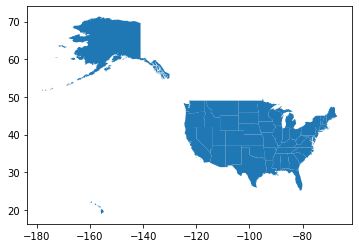

In [122]:
usa.plot()

In [124]:
usa = usa[usa.SUB_REGION == 'Pacific']
usa = usa[usa.STATE_ABBR != 'AK']
usa = usa[usa.STATE_ABBR != 'HI']

<AxesSubplot:>

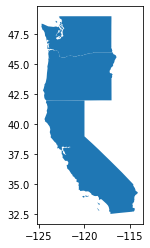

In [125]:
usa.plot()

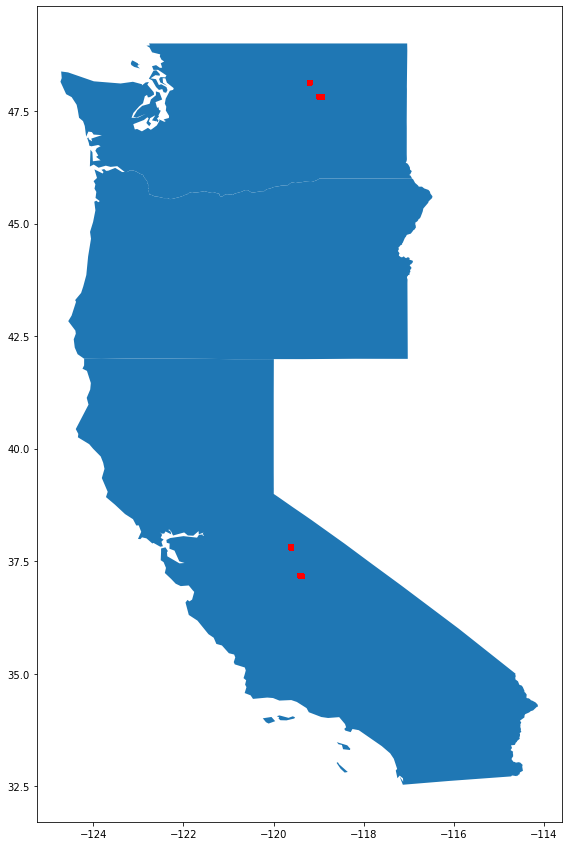

In [128]:
geometry = [Point(xy) for xy in zip(df_new['long'], df_new['lat'])]
gdf = GeoDataFrame(df_new, geometry=geometry)   

gdf.plot(ax=usa.plot(figsize=(15, 15)), marker='o', color='red', markersize=15);

### There seem to be four orchards spread out through the US 